<a href="https://colab.research.google.com/github/ElisNurhidayati/PCVK_Ganjil_2024/blob/main/Week05_ElisNurhidayati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Elis Nurhidayati**

**NIM   : 2241720035**

**Kelas : TI - 3C**

#**[MODUL 5 – Operasi Aritmatika dan Logika (Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking)](https://drive.google.com/file/d/1ygxz67ZVU-We0xsFlIY7pNsaIbgZ9t45/view?usp=sharing)**

**Tujuan**

1. Mahasiswa dapat membuat aplikasi Gamma Correction
2. Mahasiswa dapat membuat simulasi Citra dengan image depth yang ditentukan
3. Mahasiswa dapat melakukan denoising dengan menggunakan Averaging
4. Mahasiswa dapat melakukan image masking menggunakan logical operator


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Gamma Correction

In [53]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

path = '/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/woman.jpg'

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


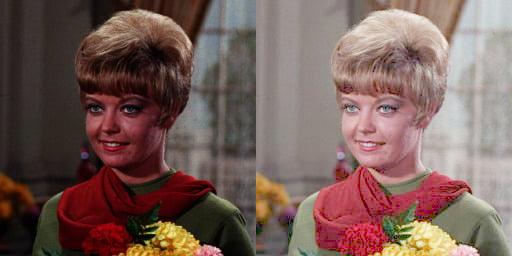

In [21]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

ori = cv.imread(path)
gamma_correction = np.zeros(ori.shape, ori.dtype)

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * pow  (ori[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((ori, gamma_correction))
cv2_imshow(final_frame)

## 2. Image Depth

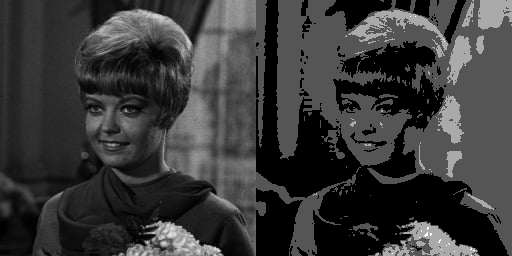

In [22]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread(path, cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
     depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);


final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Average Denoising

In [23]:
import glob

origin = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/galaxy.png')

cv_img = [5]
for img in glob.glob('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/noises/*.png'):
  n= cv.imread(img)
  cv_img.append(n)

print('Jumlah Citra yang digunakan: ', len(cv_img))

Jumlah Citra yang digunakan:  115


In [24]:
def average_denoising(jum):

  img_sum = cv_img[0]
  for i in range(1, jum):
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      image = cv_img[i]
      if image is not None:
          img_sum = cv.addWeighted(image, alpha, img_sum, beta, 0.0)

  return img_sum

In [25]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

### Jumlah Citra di Average = 5




Nilai PSNR adalah 30.07949795461558 (dB)


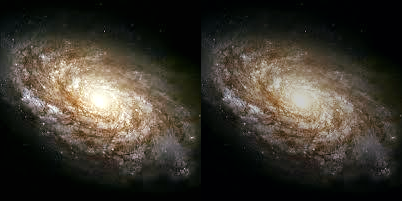

In [26]:
compressed = average_denoising(5)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average = 10

Nilai PSNR adalah 31.945445754368325 (dB)


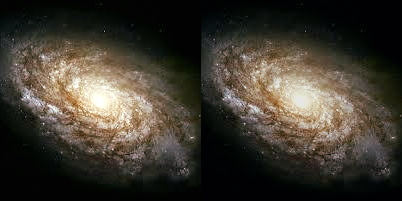

In [27]:
compressed = average_denoising(10)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average = 20

Nilai PSNR adalah 34.01533352710397 (dB)


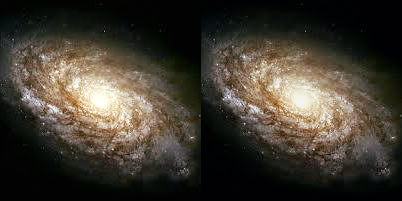

In [28]:
compressed = average_denoising(20)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average = 40

Nilai PSNR adalah 34.13088450834971 (dB)


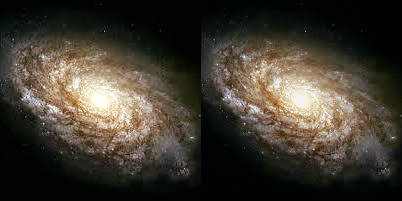

In [29]:
compressed = average_denoising(40)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average = 80

Nilai PSNR adalah 34.13088450834971 (dB)


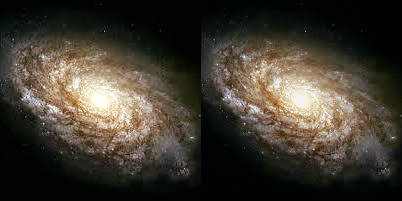

In [30]:
compressed = average_denoising(80)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Jumlah Citra di Average = 100

Nilai PSNR adalah 34.13088450834971 (dB)


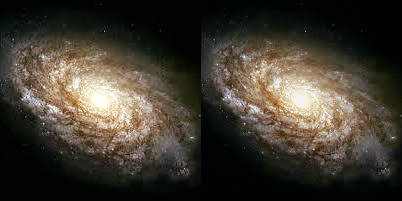

In [31]:
compressed = average_denoising(100)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

### Kesimpulan

* Metode untuk mengurangi noise atau gangguan pada gambar digital adalah dengan menggunakan average denoising, di mana kita dapat menghitung nilai rata-rata piksel di sekitar piksel yang sedang diproses.

* PSNR (Peak Signal to Noise Ratio) digunakan untuk mengukur kualitas gambar setelah menjalani proses penghilangan derau. Perbandingan antara nilai maksimum piksel dengan rata-rata kesalahan kuadrat (MSE) antara gambar asli dan gambar yang telah melalui proses denoising dapat dihitung menggunakan PSNR.

* Terdapat hubungan kebalikan antara rata-rata pengurangan noise dan PSNR. Semakin tinggi nilai rata-rata yang digunakan untuk proses denoising, semakin efektif penghilangan noise-nya. Akan tetapi, terdapat risiko kehilangan fitur penting gambar lebih banyak pula.

* Namun, jika rata-ratanya lebih kecil, sedikit noise yang dihilangkan tetapi fitur penting gambar masih terjaga.

## 4. Image Masking

Ukuran gambar:  735 x 413


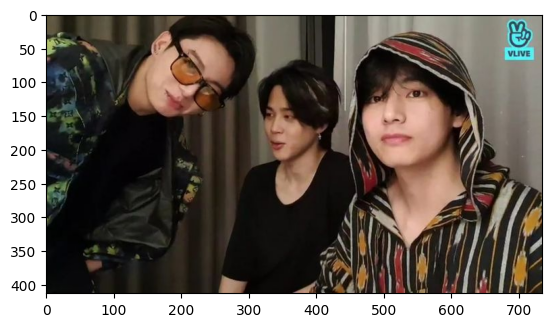

In [35]:
trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')
muda = cv.cvtColor(trio, cv.COLOR_RGB2BGR)
plt.imshow(muda)

height = trio.shape[0]
width = trio.shape[1]

print("Ukuran gambar: ", width, "x", height)

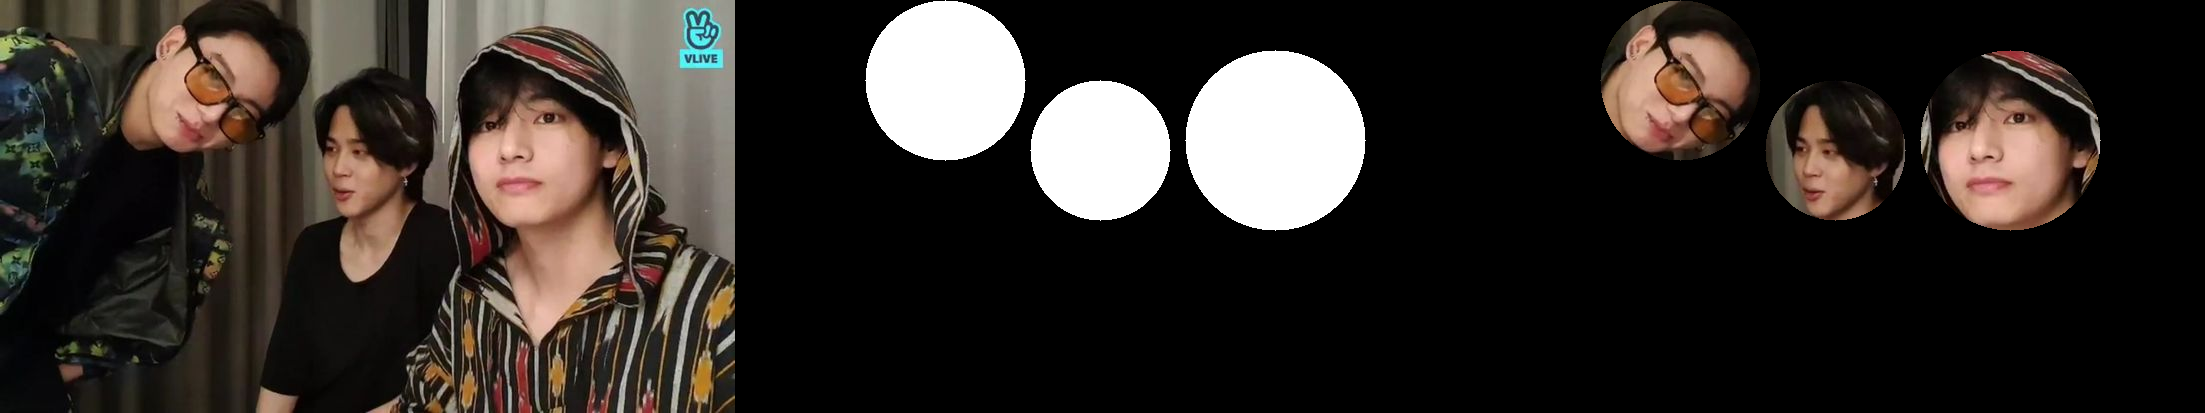

In [52]:
# Mask kosong
mask = np.zeros(muda.shape, dtype = "uint8")

# Lokasi dan radius mask
x1, y1, radius1 = 540, 140, 90
x2, y2, radius2 = 365, 150, 70
x3, y3, radius3 = 210, 80, 80

# Membuat tiga lingkaran di mask
cv.circle(mask, (x1, y1), radius1, (255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, (x2, y2), radius2, (255, 255, 255), thickness=cv.FILLED)
cv.circle(mask, (x3, y3), radius3, (255, 255, 255), thickness=cv.FILLED)

# Menerapkan mask
masked_img = cv.bitwise_and(trio, mask)
# Menampilkan
frame = cv.hconcat((trio, mask, masked_img))
cv2_imshow(frame)

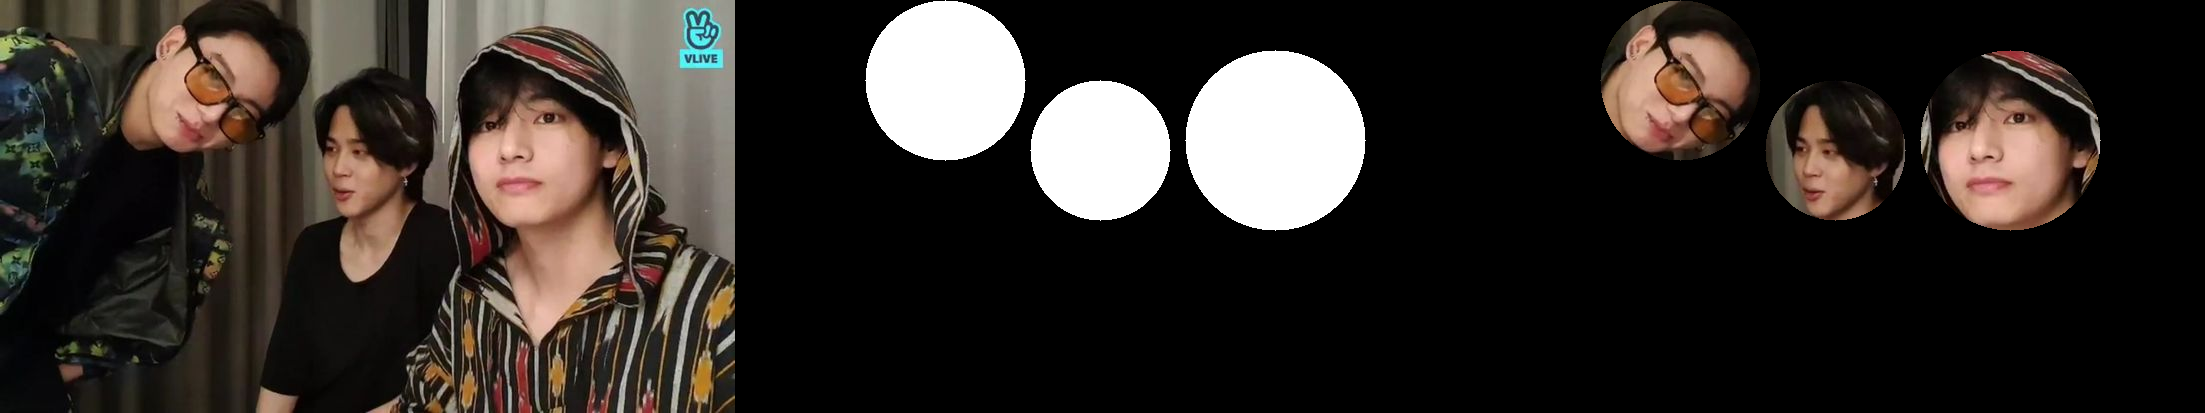

In [49]:
#Operator AND

trio = cv.imread('/content/drive/MyDrive/Elis - 3C/SMT 5/PCVK_image/trio.jfif')

mask = np.zeros(trio.shape[:2], dtype=np.uint8)

# Membuat tiga lingkaran di mask
mask = cv.circle(mask, (540, 140), 90, (255), thickness=cv.FILLED)
mask = cv.circle(mask, (365, 150), 70, (255), thickness=cv.FILLED)
mask = cv.circle(mask, (210, 80), 80, (255), thickness=cv.FILLED)

# Menggunakan operasi bitwise AND untuk menerapkan mask ke gambar asli
masked = cv.bitwise_and(trio, trio, mask=mask)

# Menggabungkan gambar asli, mask, dan hasil masking untuk ditampilkan
# Konversi mask menjadi gambar 3 channel agar dapat digabungkan dengan gambar lain
mask_bgr = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
trio_frame = cv.hconcat([trio, mask_bgr, masked])

# Menampilkan hasil
cv2_imshow(trio_frame)


## 5. Image Masking Menggunakan Operator

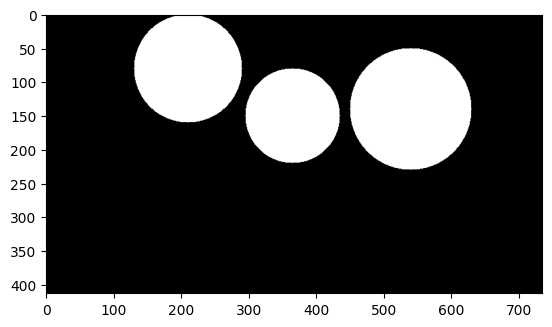

In [60]:
# Membuat mask dengan ukuran yang sama dengan gambar asli
mask = np.zeros(trio.shape[:2], dtype=np.uint8)
# Konversi mask ke 3-channel
mask_bgr = cv.cvtColor(mask, cv.COLOR_RGB2BGR)

# Membuat tiga lingkaran di mask
mask = cv.circle(mask_bgr, (540, 140), 90, (255,255,255), -1)
mask = cv.circle(mask_bgr, (365, 150), 70, (255,255,255), -1)
mask = cv.circle(mask_bgr, (210, 80), 80, (255,255,255), -1)

plt.imshow(mask_bgr)

### NOT (Komplemen)

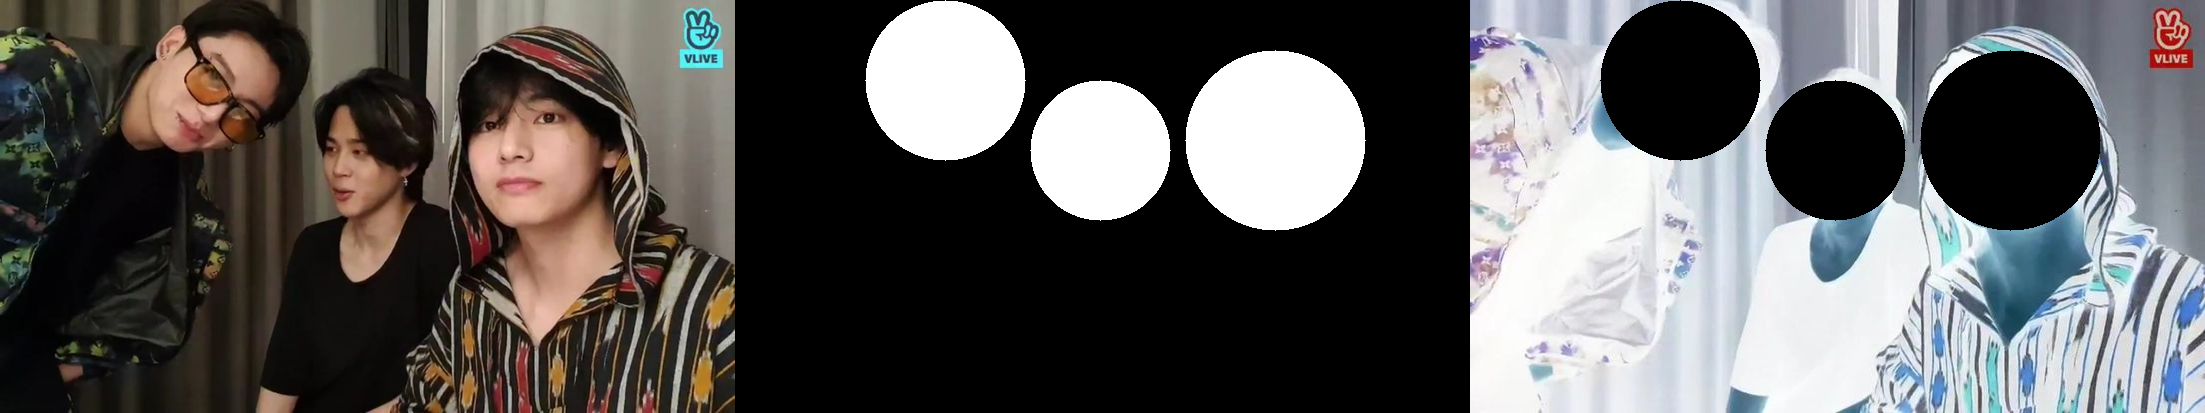

In [62]:
bitwiseNot = cv.bitwise_and(cv.bitwise_not(trio), cv.bitwise_not(mask_bgr))
final_frame = cv.hconcat((trio,mask_bgr,bitwiseNot))
cv2_imshow(final_frame)

Operasi NOT pada masking image menghasilkan negasi dari pixel pada gambar. Artinya, jika pixel pada gambar asli adalah putih, maka akan menjadi hitam setelah operasi NOT, dan sebaliknya.

### OR (Atau)

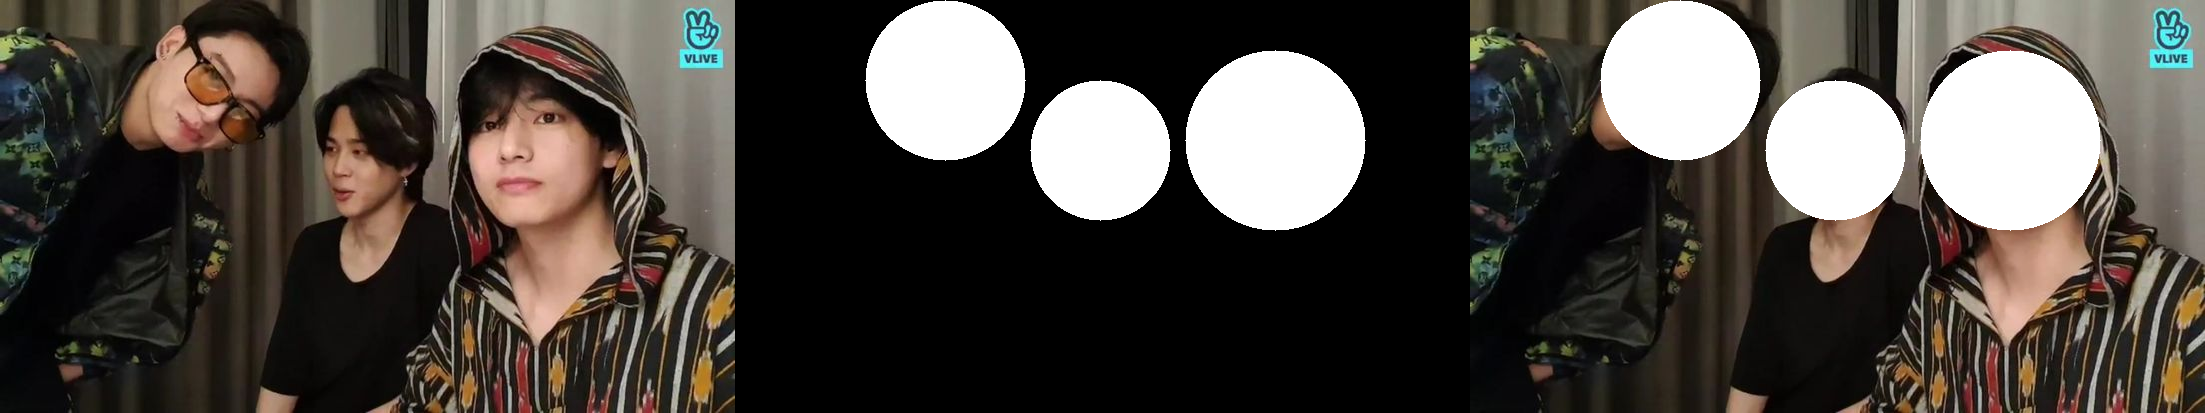

In [63]:
bitwiseOr = cv.bitwise_or(trio, mask_bgr)
final_frame = cv.hconcat((trio,mask_bgr,bitwiseOr))
cv2_imshow(final_frame)

Operasi OR ini saat maskingnya putih, maka area tersebut akan tertimpa putih dalam hasil gabungan, namun area lain tetap ditampilkan seperti aslinya.

### AND (Dan)

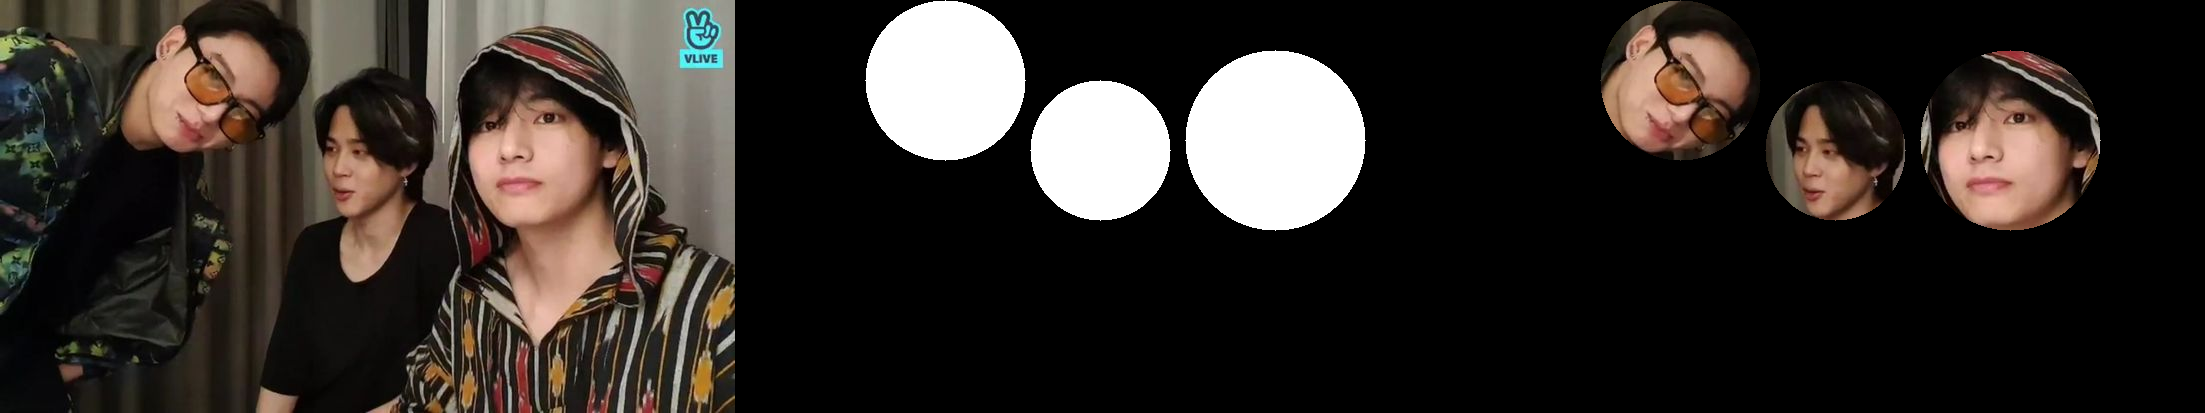

In [64]:
bitwiseAnd = cv.bitwise_and(trio, mask_bgr)
final_frame = cv.hconcat((trio,mask_bgr,bitwiseAnd))
cv2_imshow(final_frame)

Operasi AND hanya akan menampilkan area gambar yang tertindih masking yang berwarna putih.

### NAND (Not And)

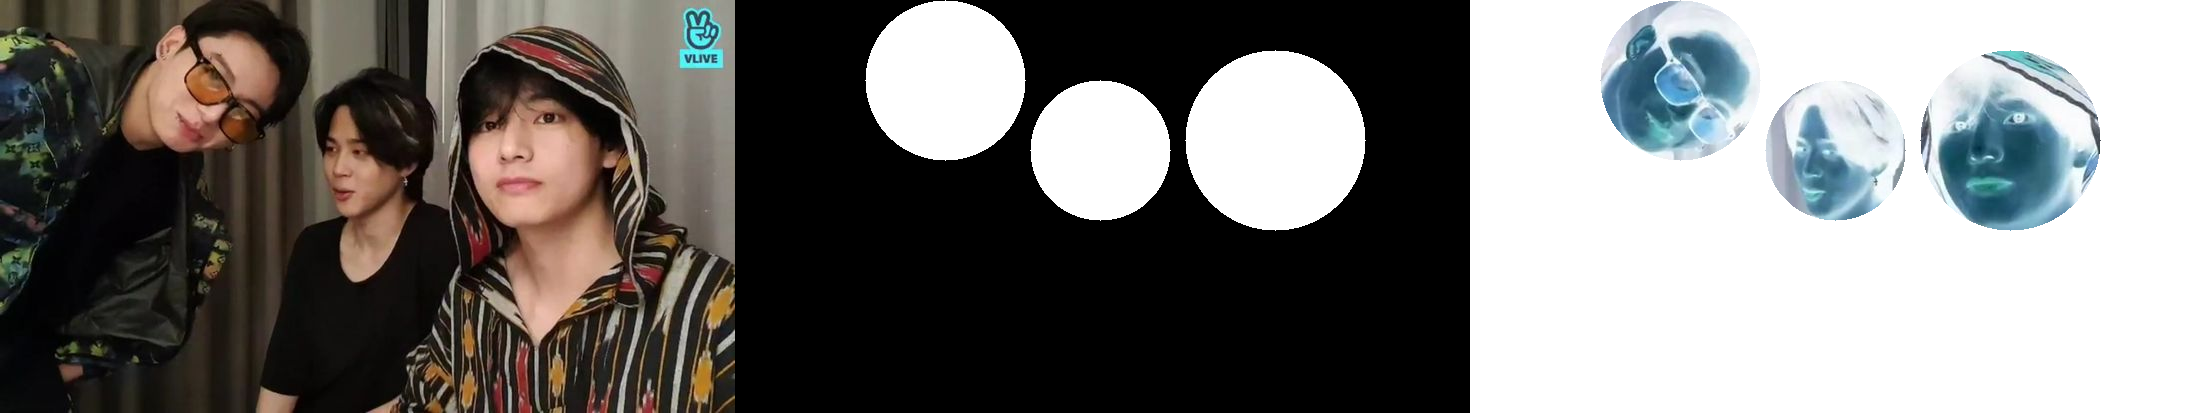

In [65]:
bitwiseNand = cv.bitwise_not(bitwiseAnd)
final_frame = cv.hconcat((trio,mask_bgr,bitwiseNand))
cv2_imshow(final_frame)

NAND merupakan operasi NOT AND. Jadi, tinggal memberi negasi pada operasi AND di atasnya saja.

### XOR (Exlusive Or)

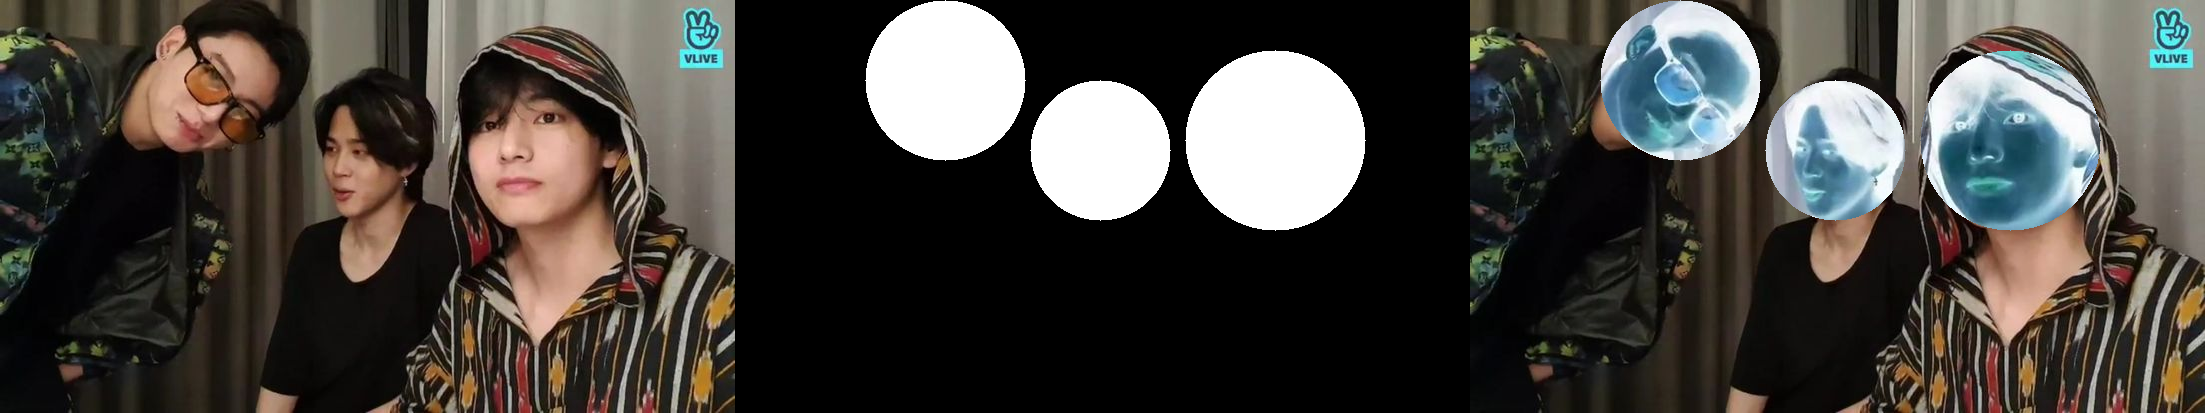

In [66]:
bitwiseXor = cv.bitwise_xor(trio, mask_bgr)
final_frame = cv.hconcat((trio,mask_bgr,bitwiseXor))
cv2_imshow(final_frame)

Pada tampilan XOR, area gambar yang tertindih masking putih akan ditampilkan warna negasinya, sedangkan area lain akan tetap seperti awalnya.